In [3]:
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

//anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:4: DeprecationWarning: sklearn.metrics.metrics is deprecated and will be removed in 0.18. Please import from sklearn.metrics
  DeprecationWarning)


In [5]:
# prep data, covert date to datetime, split for train and test, and build model
sf_crime = pd.read_csv('../../assets/datasets/sf_crime_train.csv')

sf_crime = sf_crime.dropna()

sf_crime['Dates'] = pd.to_datetime(sf_crime.Dates)
sf_crime_dates = pd.DatetimeIndex(sf_crime.Dates.values, dtype='datetime64[ns]', freq=None)

sf_crime['hour'] = sf_crime_dates.hour
sf_crime['month'] = sf_crime_dates.month
sf_crime['year'] = sf_crime_dates.year
sf_crime

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour,month,year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,23,5,2015
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,23,5,2015
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,23,5,2015
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,23,5,2015
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,23,5,2015


In [150]:
sf_crime.describe(include = "all")

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour,month,year
count,18000,18000,18000,18000,18000,18000,18000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
unique,7855,36,510,7,10,10,6381,NaN,NaN,NaN,NaN,NaN
top,2015-02-20 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,NaN,NaN,NaN
freq,25,4885,2127,2930,3287,12862,402,NaN,NaN,NaN,NaN,NaN
first,2015-02-17 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.423639,37.768466,13.646833,3.489944,2015.000000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026532,0.024391,6.539098,0.868601,0.537351
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.708154,0.000000,2.000000,2015.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.434199,37.753838,10.000000,3.000000,2015.000000


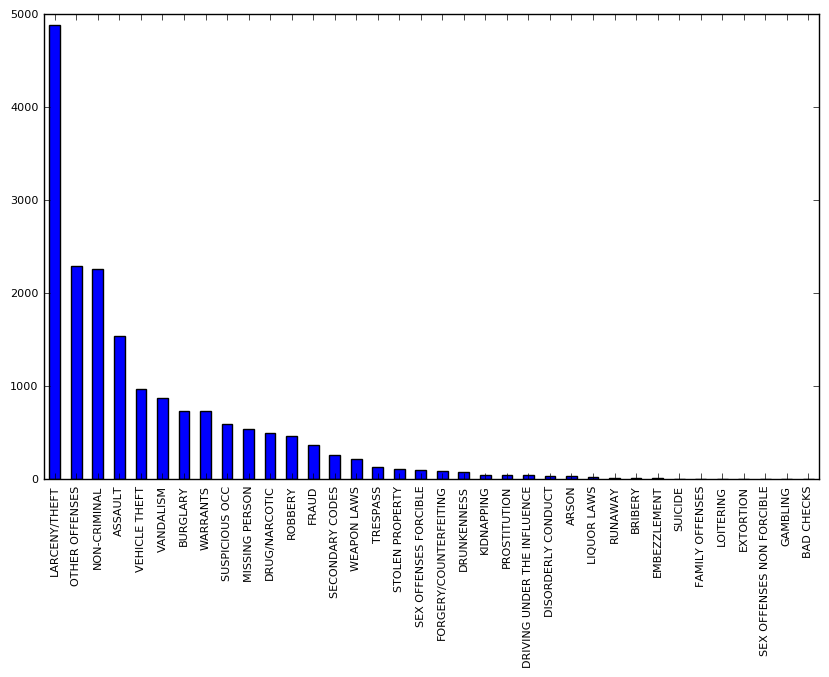

In [151]:
sf_crime["Category"].value_counts().plot(kind='bar',figsize = (10,6))
plt.show()

In [152]:
subset = ['VEHICLE THEFT','BURGLARY','DRUG/NARCOTIC']
sf_crime_sub = sf_crime[sf_crime['Category'].str.contains('|'.join(subset))]

#sf_sample = sf_crime_sub.sample(frac=0.50)

X = patsy.dmatrix('~ C(hour) + C(DayOfWeek) + C(PdDistrict)', sf_crime_sub)
Y = sf_crime_sub.Category.values

# split for train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=77)

In [156]:
# fit model with five folds and lasso regularization
# use Cs=15 to test a grid of 15 distinct parameters
# remeber: Cs describes the inverse of regularization strength
logreg_cv = LogisticRegressionCV(solver='liblinear') # update inputs here


In [157]:
# find best C per class
print('best C for class:')
best_C = {logreg_cv.classes_[i]:x for i, (x, c) in enumerate(zip(logreg_cv.C_, logreg_cv.classes_))}
print(best_C)

best C for class:


AttributeError: 'LogisticRegressionCV' object has no attribute 'C_'

In [158]:
# fit regular logit model to 'DRUG/NARCOTIC' and 'BURGLARY' classes
# use lasso penalty


In [159]:
# build confusion matrices for the models above
Y_1_pred = logreg_1.predict(X_train)
Y_2_pred = logreg_2.predict(X_train)

conmat_1 = confusion_matrix(Y_train, Y_1_pred, labels=logreg_1.classes_)
conmat_1 = pd.DataFrame(conmat_1, columns=logreg_1.classes_, index=logreg_1.classes_)

conmat_2 = confusion_matrix(Y_train, Y_2_pred, labels=logreg_2.classes_)
conmat_2 = pd.DataFrame(conmat_2, columns=logreg_2.classes_, index=logreg_2.classes_)


NameError: name 'logreg_1' is not defined

In [160]:
# print classification reports


In [161]:
# run gridsearch using GridSearchCV and 5 folds
# score on f1_macro; what does this metric tell us?
logreg = LogisticRegression()
C_vals = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']
ge = GridSearchCV

In [162]:
# find the best parameter


In [163]:
# use this parameter to .fit, .predict, and print a classification_report for our X and Y


setting threshhold for binary class

In [164]:
subset = ['ASSAULT','VANDALISM']
sf_crime_sub = sf_crime[sf_crime['Category'].str.contains('|'.join(subset))]

#sf_sample = sf_crime_sub.sample(frac=0.50)

X = patsy.dmatrix('~ C(hour) + C(DayOfWeek) + C(PdDistrict) + X + Y', sf_crime_sub)  #
Y = sf_crime_sub.Category.values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=5)

In [1]:
clf = LogisticRegressionCV(cv = 5,scoring = 'accuracy')
clf.fit(X_train,Y_train)

NameError: name 'LogisticRegressionCV' is not defined

In [166]:
Ypred = clf.predict(X_test)
conmat = confusion_matrix(Y_test,Ypred,labels = clf.classes_)
pd.DataFrame(conmat,columns = clf.classes_,index =clf.classes_)

,ASSAULT,VANDALISM
ASSAULT,458,50
VANDALISM,229,60


In [167]:
print(classification_report(Y_test,Ypred))

             precision    recall  f1-score   support

    ASSAULT       0.67      0.90      0.77       508
  VANDALISM       0.55      0.21      0.30       289

avg / total       0.62      0.65      0.60       797



In [135]:
Y_score = clf.fit(X_train,Y_train).decision_function(X_test)
fpr,tpr,thresholds = metrics.roc_curve(Y_test,Y_score,pos_label = "VANDALISM")

In [136]:
np.round(y_score,2) #log odds of y

array([-0.57, -0.8 , -1.25, -0.54, -0.87, -0.93, -0.52, -0.55, -0.47,
       -0.11, -0.73, -0.6 , -0.25, -0.4 , -0.45, -1.08, -0.24, -0.61,
       -0.78, -0.43, -1.47, -0.55, -0.39, -0.36, -0.39, -0.78, -1.16,
       -0.54, -0.47, -0.7 , -0.52, -0.26, -0.98, -0.53, -0.92, -1.28,
       -1.15, -0.78, -0.32, -1.26, -0.28, -0.37, -0.32, -0.76, -0.28,
       -0.58, -0.6 , -0.45, -0.58, -1.05, -0.77, -0.49, -0.66, -1.13,
       -1.26, -0.27, -1.06, -0.92, -0.52, -0.06, -0.69, -0.53, -0.65,
       -0.63, -1.26, -0.68, -0.45, -0.69, -1.21, -0.44, -0.85, -0.27,
       -0.73, -0.35, -0.69, -1.3 , -0.61, -1.28, -0.94, -0.63, -0.68,
       -0.46, -0.26, -1.06, -0.35, -0.06, -1.12, -0.79, -1.27, -0.61,
       -0.41, -1.07, -0.16, -0.94, -0.88, -0.52, -0.65, -0.49, -0.57,
       -1.04, -0.12, -0.61, -0.52, -0.33, -0.51, -0.45, -0.52, -0.56,
       -0.52, -0.57, -0.27, -0.23, -0.54, -1.3 , -0.35, -0.36, -0.67,
       -0.65, -0.43, -0.64, -0.38, -0.34, -0.18, -0.19, -1.26, -0.36,
       -0.71, -0.48,

In [137]:
Ypred #ypreducted

array(['ASSAULT', 'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'VANDALISM', 'ASSAULT', 'ASSAULT', 'VANDALISM', 'ASSAULT',
       'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'VANDALISM',
       'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'VANDALISM', 'ASSAULT',
       'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'VANDALISM',
       'ASSAULT', 'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'ASSAULT', 'ASSAULT', 'VANDALISM', 'ASSAULT', 'VANDALISM',
       'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'VANDALISM',
       'ASSAULT', 'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAUL

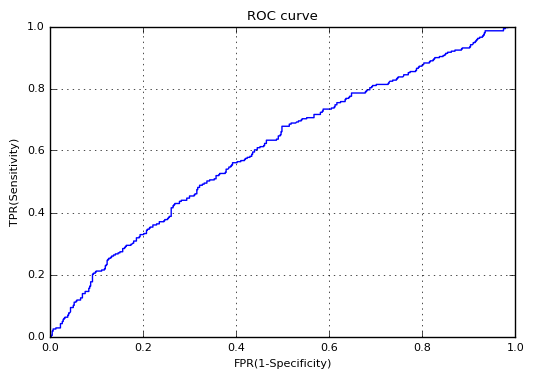

In [143]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size'] = 8
plt.title('ROC curve')
plt.xlabel('FPR(1-Specificity)')
plt.ylabel('TPR(Sensitivity)')
plt.grid(True)
plt.show()

In [139]:
def evaluate_threshold(threshold):
    print('TPR:',tpr[thresholds>threshold][-1])
    print('FPR:',fpr[thresholds>threshold][-1])

In [147]:
for i in np.arange(min(thresholds),max(thresholds),0.5):
    print('Threshold:'),i
    evaluate_threshold(i)
    print

Threshold: -2.25267607105
('TPR:', 1.0)
('FPR:', 0.98425196850393704)

Threshold: -1.75267607105
('TPR:', 0.98615916955017302)
('FPR:', 0.93503937007874016)

Threshold: -1.25267607105
('TPR:', 0.89965397923875434)
('FPR:', 0.82677165354330706)

Threshold: -0.75267607105
('TPR:', 0.70242214532871972)
('FPR:', 0.54133858267716539)

Threshold: -0.25267607105
('TPR:', 0.37024221453287198)
('FPR:', 0.23818897637795275)

Threshold: 0.24732392895
('TPR:', 0.086505190311418678)
('FPR:', 0.043307086614173228)

Threshold: 0.74732392895
('TPR:', 0.0)
('FPR:', 0.0)

Threshold: 1.24732392895
('TPR:', 0.0)
('FPR:', 0.0)

